In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
from decision_tree import calculate_information_gain, decision_tree_train, decision_tree_predict
from naive_bayes import naive_bayes_train, naive_bayes_predict
from load_all_data import load_all_data
from crossval import cross_validate
import random
import matplotlib.pyplot as plt

In [3]:
num_words, num_training, num_testing, train_data, test_data, train_labels, test_labels = load_all_data()

Found pickle file. Loading 20news data from file.
Doing so should be faster than loading from raw text, but if the file is corrupted, delete it and this script will automatically load from the raw text next time it is run.
Finished loading in 0.03 seconds.


In [4]:
d = 5000 # maximum number of features

In [5]:
# Filter features by information gain

gain = calculate_information_gain(train_data, train_labels)

print(gain)

# sort features by calculated information gain
ranks = gain.argsort()[::-1]

train_data = train_data[ranks[:d], :]
test_data = test_data[ranks[:d], :]

# convert training data to dense ndarray
train_data = train_data.toarray()
test_data = test_data.toarray()

[6.89207785e-03 5.72929455e-03 2.35420535e-02 ... 1.76640647e-12
 1.76640647e-12 1.76640647e-12]


In [6]:
# randomly shuffle data

order = list(range(num_training))
random.shuffle(order)

train_data = train_data[:, order]
train_labels = train_labels[order]

In [7]:
# Try naive Bayes with cross-validation

alpha_values = 10.0 ** np.array(range(-10,0))

cv_score = np.zeros(alpha_values.size)

params = dict()

for i in range(alpha_values.size):
    params['alpha'] = alpha_values[i]
    cv_score[i], _ = cross_validate(naive_bayes_train, naive_bayes_predict, 
                                    train_data, train_labels, 8, params)

Text(0.5, 1.0, 'Naive Bayes Cross-Validation Accuracy')

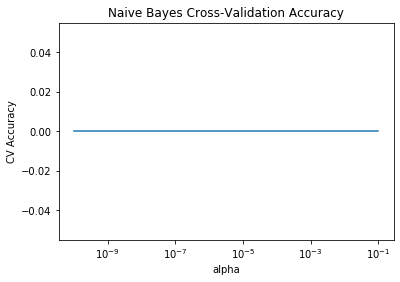

In [8]:
plt.semilogx(alpha_values, cv_score)
plt.xlabel('alpha')
plt.ylabel('CV Accuracy')
plt.title('Naive Bayes Cross-Validation Accuracy')

In [9]:
# Train on full data with best alpha value

best_alpha_index = cv_score.argmax()

params['alpha'] = alpha_values[best_alpha_index]

nb_model = naive_bayes_train(train_data, train_labels, params)

num_of_classes 20
prior_smoothed, sum(prior_smoothed) , size
[0.043 0.052 0.051 0.052 0.051 0.053 0.052 0.053 0.053 0.053 0.053 0.053
 0.052 0.053 0.053 0.053 0.048 0.05  0.041 0.033] 0.9999999999999999 20
prior_smoothed_loged
 [-3.156 -2.965 -2.981 -2.955 -2.975 -2.946 -2.963 -2.946 -2.94  -2.943
 -2.936 -2.943 -2.948 -2.943 -2.945 -2.935 -3.029 -2.995 -3.19  -3.4  ]
Calculating column_sum, label: 0
Calculating column_sum, label: 1
Calculating column_sum, label: 2
Calculating column_sum, label: 3
Calculating column_sum, label: 4
Calculating column_sum, label: 5
Calculating column_sum, label: 6
Calculating column_sum, label: 7
Calculating column_sum, label: 8
Calculating column_sum, label: 9
Calculating column_sum, label: 10
Calculating column_sum, label: 11
Calculating column_sum, label: 12
Calculating column_sum, label: 13
Calculating column_sum, label: 14
Calculating column_sum, label: 15
Calculating column_sum, label: 16
Calculating column_sum, label: 17
Calculating column_sum, lab

In [10]:
# Compute testing accuracy

nb_predictions = naive_bayes_predict(test_data, nb_model)

nb_accuracy = np.mean(nb_predictions == test_labels)

print("Naive Bayes testing accuracy: %f" % nb_accuracy)

data
 [[ True  True False ... False False False]
 [False False False ... False False  True]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
data_bar
 [[0 0 1 ... 1 1 1]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
cond prob
 [[3.500e-01 1.205e-02 5.245e-03 ... 4.078e-02 4.526e-02 3.351e-01]
 [2.083e-13 9.811e-02 6.381e-01 ... 8.865e-03 1.293e-02 2.660e-13]
 [2.083e-13 1.721e-13 1.049e-02 ... 1.773e-13 4.310e-03 2.660e-03]
 ...
 [2.083e-13 1.721e-03 1.748e-13 ... 5.319e-03 8.621e-03 2.660e-13]
 [4.167e-03 1.721e-03 1.748e-02 ... 1.773e-02 2.155e-03 2.660e-03]
 [2.083e-13 1.721e-13 1.748e-13 ... 1.773e-13 2.155e-13 2.394e-02]]
cond prob shape (5000, 20)
cond_prob_bar
 [[0.65  0.988 0.995 ... 0.959 0.955 0.665]
 [1.    0.902 0.362 ... 0.991 0.987 1.   ]
 [1.    1.    0.99  ... 1.    0.996 0.997]
 ...
 [1. 

In [11]:
# prune data to even smaller (since decision tree takes much longer to train)

d = 250

train_data_small = train_data[:d, :]
test_data_small = test_data[:d, :]

In [12]:
depth_values = np.array([2, 4, 8, 16, 32, 64])

cv_score = np.zeros(depth_values.size)

params = dict()

for i in range(depth_values.size):
    params['max_depth'] = depth_values[i]
    cv_score[i], _ = cross_validate(decision_tree_train, decision_tree_predict, 
                                 train_data_small, train_labels, 3, params)

Text(0.5, 1.0, 'Decision Tree Cross-Validation Accuracy')

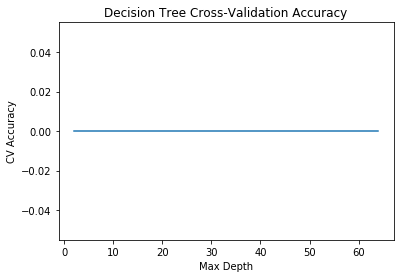

In [15]:
plt.plot(depth_values, cv_score)
plt.xlabel('Max Depth')
plt.ylabel('CV Accuracy')
plt.title('Decision Tree Cross-Validation Accuracy')

In [14]:
# Train on full data with best depth

best_depth_index = cv_score.argmax()

params['max_depth'] = depth_values[best_depth_index]

dt_model = decision_tree_train(train_data, train_labels, params)

{'left 0': {'left 22': {'predicted': 15}, 'right 22': {'predicted': 15}},
 'right 0': {'left 1': {'predicted': 2}, 'right 1': {'predicted': 10}}}


In [ ]:
# Compute testing accuracy

dt_predictions = decision_tree_predict(test_data, dt_model)

dt_accuracy = np.mean(dt_predictions == test_labels)

print("Decision tree testing accuracy: %f" % dt_accuracy)